In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams.update({'font.size': 12})

In [2]:
# data = 'http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls'
housing_df = pd.read_csv("housing.csv")


In [3]:
# Make column labels lowercase
housing_df.columns = map(str.lower, housing_df.columns)
# Replace spaces in columns with underscore
housing_df.columns = housing_df.columns.str.replace('\s+', '_')

In [4]:
housing_df.head()

,unnamed:_0,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
housing_df.shape

(2930, 83)

In [6]:
# Set 'Id' column as index
housing_df.set_index('order', inplace=True)
# Drop 'pid' column if not needed
housing_df.drop(['pid',"unnamed:_0"],axis=1, inplace=True)
housing_df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2930 non-null   int64  
 1   ms_zoning        2930 non-null   object 
 2   lot_frontage     2440 non-null   float64
 3   lot_area         2930 non-null   int64  
 4   street           2930 non-null   object 
 5   alley            198 non-null    object 
 6   lot_shape        2930 non-null   object 
 7   land_contour     2930 non-null   object 
 8   utilities        2930 non-null   object 
 9   lot_config       2930 non-null   object 
 10  land_slope       2930 non-null   object 
 11  neighborhood     2930 non-null   object 
 12  condition_1      2930 non-null   object 
 13  condition_2      2930 non-null   object 
 14  bldg_type        2930 non-null   object 
 15  house_style      2930 non-null   object 
 16  overall_qual     2930 non-null   int64  
 17  overall_cond  

**MSSubClass: Identifies the type of dwelling involved in the sale.**	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
The MSSubClass was converted to int64 by Pandas because the column is all integers. However, these are categories that have been assigned arbitrary numbers for classification purposes.

In [8]:
# Convert 'MSSubClass' column to type(str)
housing_df['ms_subclass'] = housing_df['ms_subclass'].astype(str)

In [9]:
housing_df['ms_subclass'].dtype

dtype('O')

In [10]:
housing_df.describe()

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [11]:
# p = sns.pairplot(housing_df)

# Plot Histograms of the Numeric Columns

In [12]:
# Create list of numeric columns
numeric_columns = housing_df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['lot_frontage', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']


In [13]:
# Print how many numeric columns so figure out plot grid
print('\n', len(numeric_columns), 'numerical columns')


 36 numerical columns


In [14]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,100))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax, alpha=0.8)
        plt.axvline(df[var_name].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(df[var_name].median(), color='black', linestyle='dashed', linewidth=2, label='Median')
        ax.set_title(var_name+" Distribution")
        plt.legend()
    fig.tight_layout()
#     plt.savefig('../assets/png/histograms.png')
    plt.show()

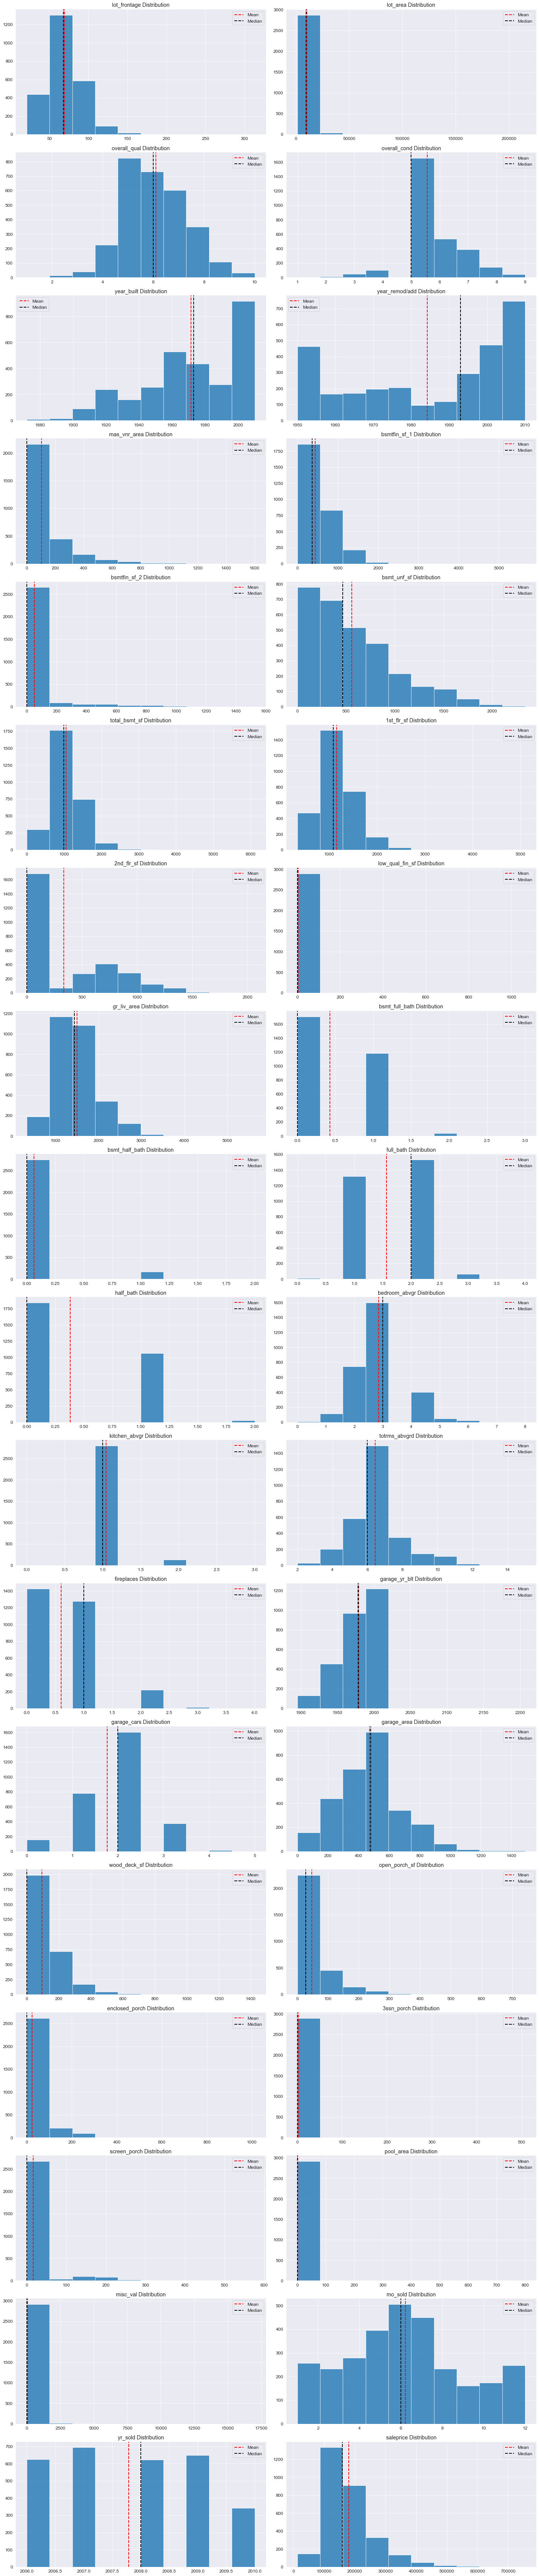

In [15]:

draw_histograms(housing_df, numeric_columns, int(len(numeric_columns)/2)+1, 2)

# Assumptions for Linear Regression

#1> Linearity

Plot the Numeric Columns Against saleprice Using Scatterplots

Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable


In [16]:
# Draw scatter plots of numerical columns
def draw_scatters(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,60))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.regplot(x=var_name,y='saleprice',data=df,fit_reg=False, scatter_kws={'alpha':0.2})
        ax.set_title(var_name +" vs. Sale Price")
    fig.tight_layout()
#     plt.savefig('../assets/png/scatters.png')
    plt.show()

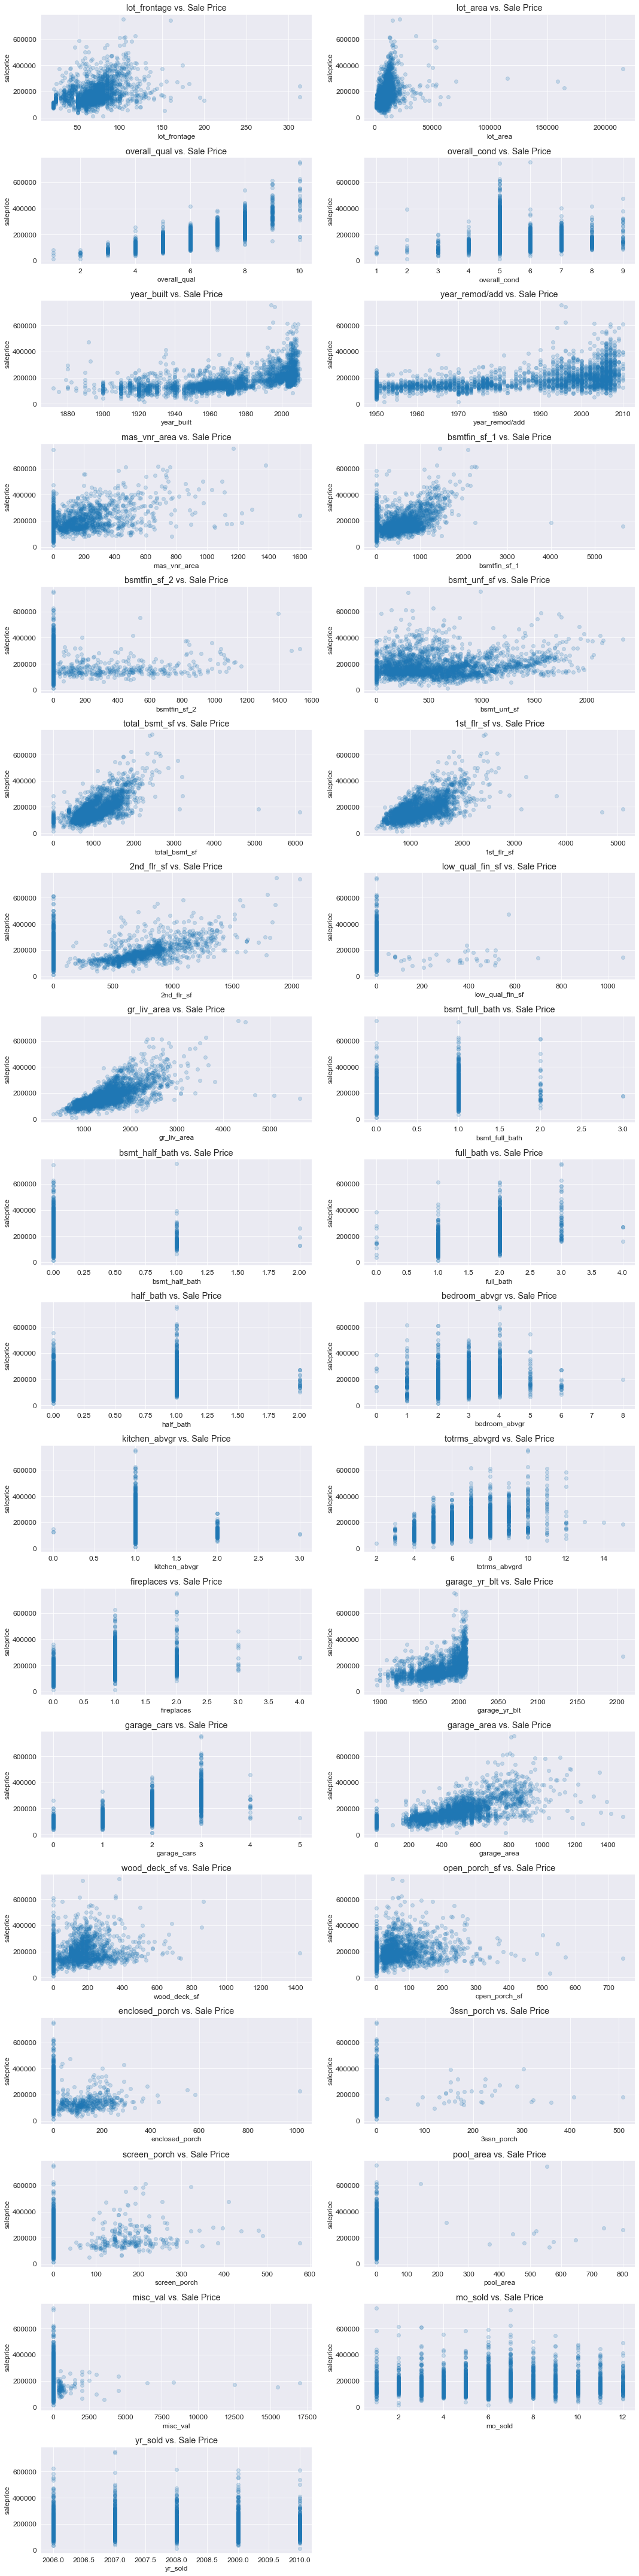

In [17]:
draw_scatters(housing_df, numeric_columns[:-1], int(len(numeric_columns[:-1])/2)+1, 2)

# Use Bar Plots to Plot Categorical Features against saleprice

In [18]:
# # Create list of categorical columns
cat_columns = housing_df.select_dtypes(include=[object]).columns.tolist()
print(cat_columns)

['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'sale_type', 'sale_condition']


In [19]:
# # Print how many categorical columns so figure out plot grid
# print(len(cat_columns), 'categorical columns')

In [20]:
# # Draw bar plots of categorical data
# def draw_bars(df, variables, n_rows, n_cols):
#     fig=plt.figure(figsize=(20,160))
#     for i, var_name in enumerate(variables):
#         ax=fig.add_subplot(n_rows,n_cols,i+1)
#         sns.barplot(x=var_name,y='saleprice',data=df,ci='sd')
#         if var_name in ['neighborhood','exterior_1st','exterior_2nd']:
#             plt.sca(ax)
#             plt.xticks(rotation=70)
#         ax.set_title(var_name)
#     fig.tight_layout()

#     plt.show()

In [21]:

# draw_bars(housing_df, cat_columns, int(len(cat_columns)/2)+1, 2)

# Plot Correlations /  multicollinearity for independet variable

Look for correlation of rows where the dependent variable (Sales in this case) is not involved because if a variable is correlated with the dependent variable then this would be a good sign for our model.

 In case there was any then we would try to remove one of the correlated variables depending on which was more important to our regression model.

In [22]:
corr = housing_df.corr()
corr['saleprice'].sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.799262
gr_liv_area        0.706780
garage_cars        0.647877
garage_area        0.640401
total_bsmt_sf      0.632280
1st_flr_sf         0.621676
year_built         0.558426
full_bath          0.545604
year_remod/add     0.532974
garage_yr_blt      0.526965
mas_vnr_area       0.508285
totrms_abvgrd      0.495474
fireplaces         0.474558
bsmtfin_sf_1       0.432914
lot_frontage       0.357318
wood_deck_sf       0.327143
open_porch_sf      0.312951
half_bath          0.285056
bsmt_full_bath     0.276050
2nd_flr_sf         0.269373
lot_area           0.266549
bsmt_unf_sf        0.182855
bedroom_abvgr      0.143913
screen_porch       0.112151
pool_area          0.068403
mo_sold            0.035259
3ssn_porch         0.032225
bsmtfin_sf_2       0.005891
misc_val          -0.015691
yr_sold           -0.030569
bsmt_half_bath    -0.035835
low_qual_fin_sf   -0.037660
overall_cond      -0.101697
kitchen_abvgr     -0.119814
enclosed_porch    -0

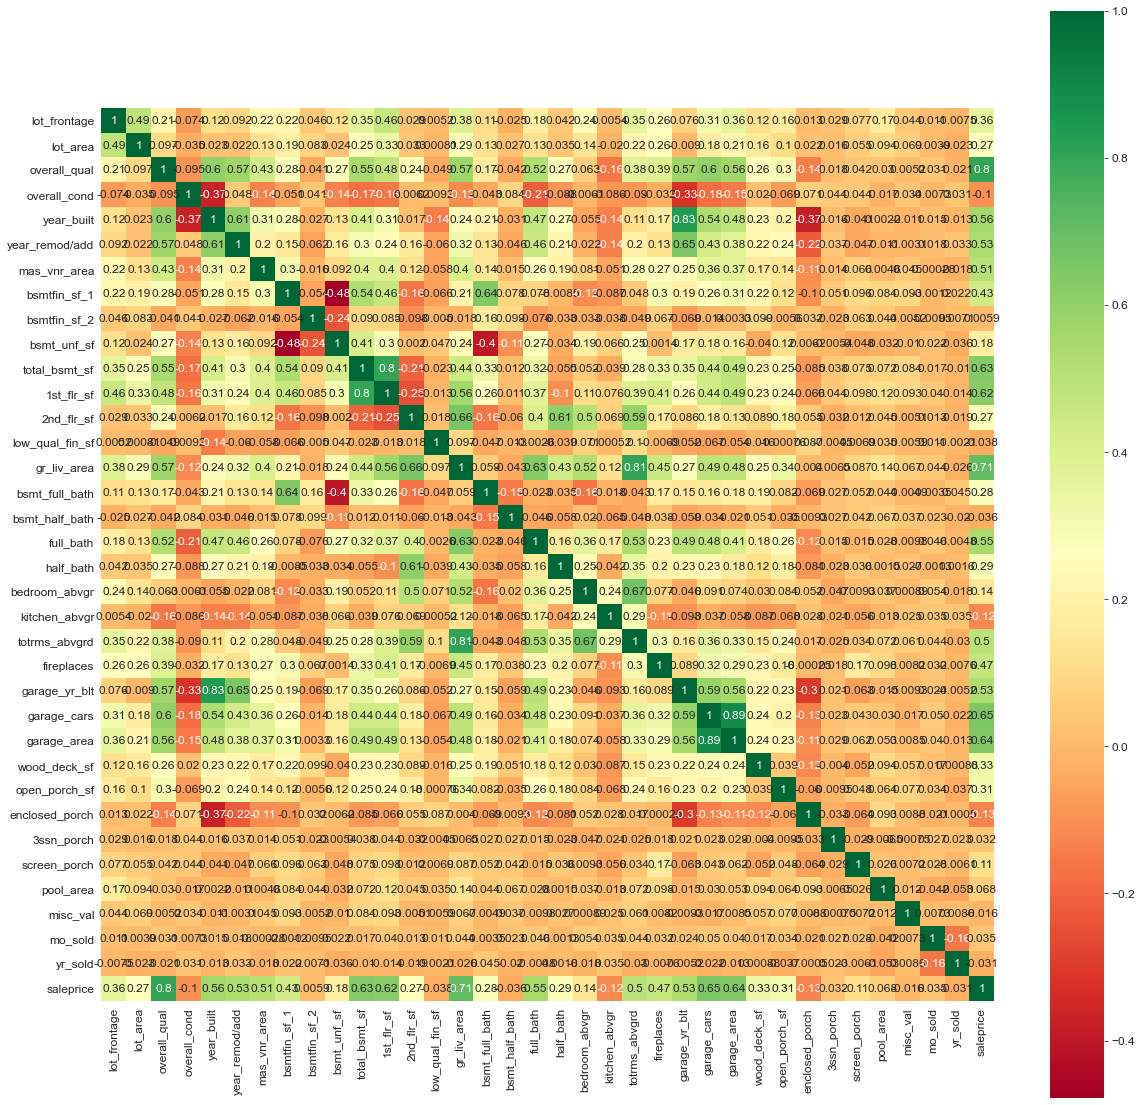

In [23]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(housing_df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

# Preprocessing

## A. Identify and Remove Outliers from saleprice

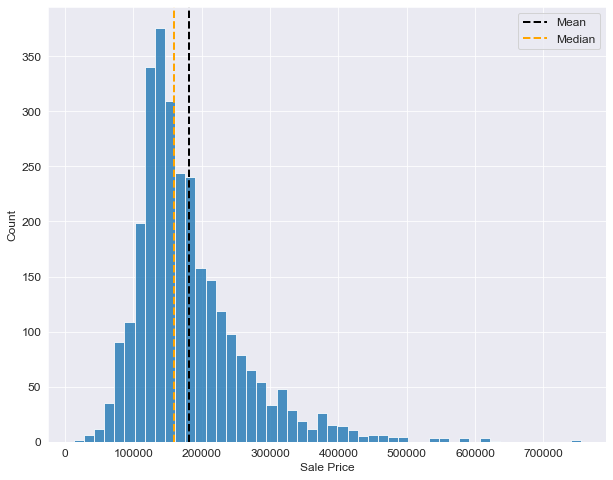

In [24]:
housing_df['saleprice'].hist(bins=50, alpha=0.8)
plt.axvline(housing_df['saleprice'].mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(housing_df['saleprice'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.legend()
plt.show()

Z-score treatment :

Assumption– The features are normally or approximately normally distributed

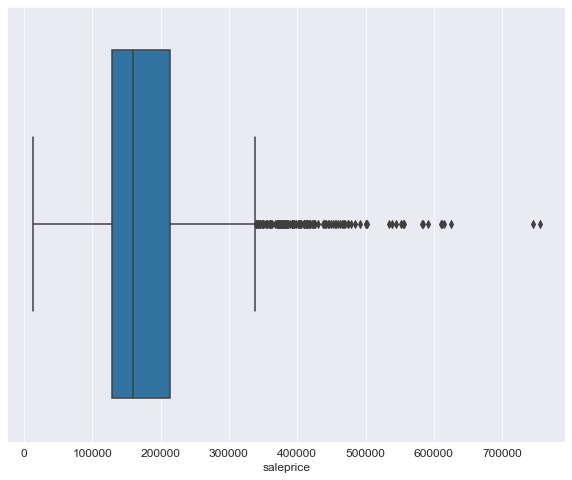

In [25]:
sns.boxplot(housing_df['saleprice'], orient='h')
plt.show()

In [26]:
housing_df['saleprice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: saleprice, dtype: float64

In [27]:
print("Highest allowed",housing_df['saleprice'].mean() + 1.5*housing_df['saleprice'].std())

Highest allowed 300626.09860325686


In [28]:
housing_df=housing_df[housing_df['saleprice']<300626.09860325686]

In [29]:
housing_df

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


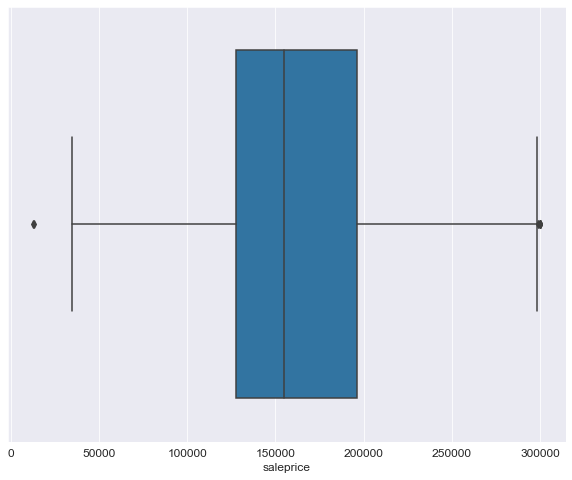

In [30]:
sns.boxplot(housing_df['saleprice'], orient='h')
plt.show()

# B. Fill Missing Data

In [31]:
# Columns with null (np.nan) values
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nan_col_list

['lot_frontage',
 'alley',
 'mas_vnr_type',
 'mas_vnr_area',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'electrical',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

In [32]:
# Sum of nan values of each column
nulls = housing_df[nan_col_list].isnull().sum()
nulls

lot_frontage       472
alley             2504
mas_vnr_type        19
mas_vnr_area        19
bsmt_qual           80
bsmt_cond           80
bsmt_exposure       83
bsmtfin_type_1      80
bsmtfin_sf_1         1
bsmtfin_type_2      81
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
electrical           1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1414
garage_type        157
garage_yr_blt      159
garage_finish      159
garage_cars          1
garage_area          1
garage_qual        159
garage_cond        159
pool_qc           2690
fence             2138
misc_feature      2594
dtype: int64

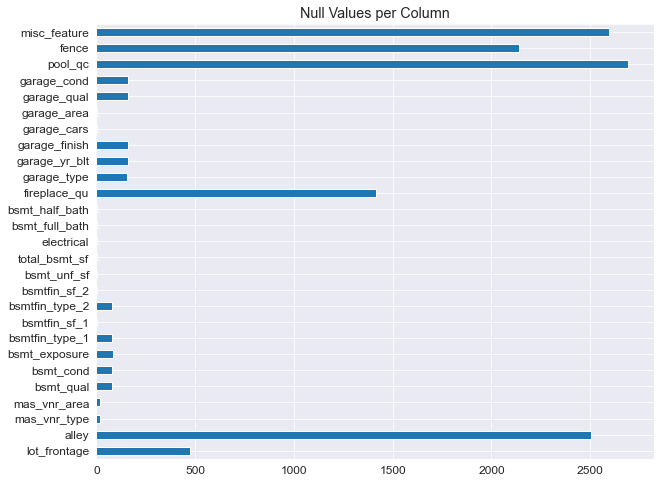

In [33]:
nulls.plot(kind='barh', title='Null Values per Column')
plt.show()

In [34]:
# Find how many missing values and percentage missing in each column
# This gives me an idea of priority
print('Missing data in each dataframe column:')
for col in housing_df.columns:
    missing_data = len(housing_df) - housing_df[col].count()
    if (missing_data > 0 or missing_data =='NaN'):
         print(col, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(housing_df))) * 
             100, 3)), '% of total')
            

Missing data in each dataframe column:
lot_frontage : 472 missing values is 17.481 % of total
alley : 2504 missing values is 92.741 % of total
mas_vnr_type : 19 missing values is 0.704 % of total
mas_vnr_area : 19 missing values is 0.704 % of total
bsmt_qual : 80 missing values is 2.963 % of total
bsmt_cond : 80 missing values is 2.963 % of total
bsmt_exposure : 83 missing values is 3.074 % of total
bsmtfin_type_1 : 80 missing values is 2.963 % of total
bsmtfin_sf_1 : 1 missing values is 0.037 % of total
bsmtfin_type_2 : 81 missing values is 3.0 % of total
bsmtfin_sf_2 : 1 missing values is 0.037 % of total
bsmt_unf_sf : 1 missing values is 0.037 % of total
total_bsmt_sf : 1 missing values is 0.037 % of total
electrical : 1 missing values is 0.037 % of total
bsmt_full_bath : 2 missing values is 0.074 % of total
bsmt_half_bath : 2 missing values is 0.074 % of total
fireplace_qu : 1414 missing values is 52.37 % of total
garage_type : 157 missing values is 5.815 % of total
garage_yr_blt :

In [35]:
# Build a list of colums where NaN should be a string 'NA'
col_na = ['misc_feature',
          'fence',
          'pool_qc',
          'garage_cond',
          'garage_qual',
          'garage_finish',
          'garage_type',
          'fireplace_qu',
          'bsmtfin_type_1',
          'bsmtfin_type_2',
          'bsmt_exposure',
          'alley']

In [36]:
housing_df[col_na] = housing_df[col_na].fillna('NA')
print(housing_df.shape)
housing_df.head(2)

(2700, 80)


,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000


In [37]:
# Function to make random distribution based on existing data
def make_randoms(df, col):
    return np.random.normal(df[col].mean(),
                            scale=df[col].std(),
                            size=df[col].isnull().sum()).astype(int)

In [38]:
# Use random number generator to create a series of numbers based on 'garage_yr_blt' statistics
garage_yr_blt_rand = make_randoms(housing_df,'garage_yr_blt')
garage_yr_blt_rand

array([1916, 2027, 1967, 1997, 1976, 1968, 1973, 1954, 1950, 1983, 1968,
       1933, 1990, 1991, 1990, 1965, 2018, 1978, 1946, 2015, 1955, 1985,
       2005, 1929, 1982, 2004, 1946, 1988, 1963, 1924, 1977, 1947, 2004,
       2003, 1965, 1945, 1997, 2009, 1987, 1955, 1966, 1983, 2026, 1977,
       1967, 1989, 1970, 1980, 1940, 1990, 1999, 1962, 1993, 1997, 1960,
       1984, 1995, 1984, 1967, 1998, 1954, 1953, 1944, 1953, 1938, 1957,
       1975, 1983, 1979, 1996, 1990, 1986, 1993, 1955, 2002, 1987, 1972,
       2002, 2001, 1986, 1976, 1972, 1978, 1979, 1992, 1977, 1969, 1980,
       1935, 1958, 1993, 2009, 1958, 1961, 1975, 1938, 1947, 1944, 1974,
       1974, 1955, 1978, 1956, 2017, 2033, 1934, 1985, 1959, 1941, 1970,
       1957, 1970, 1991, 1988, 1982, 1928, 1968, 1982, 1971, 1971, 1949,
       1982, 1992, 1997, 1954, 1992, 1994, 1976, 1963, 1976, 1957, 1971,
       1997, 1977, 1989, 1981, 1989, 1965, 1954, 1978, 1953, 1952, 1996,
       1997, 1974, 1912, 1995, 2000, 1977, 1973, 19

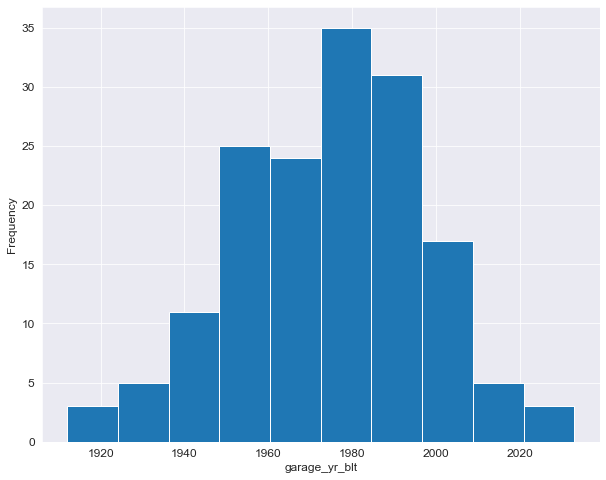

In [39]:
# Plot the random distribution of the 'garage_yr_blt' column
plt.hist(garage_yr_blt_rand)
plt.xlabel('garage_yr_blt')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Use random number generator to create a series of numbers based on 'LotFrontage' statistics
lot_frontage_rand = make_randoms(housing_df,'lot_frontage')
lot_frontage_rand

array([ 37, 100,  44, 108,  77,  56,  53,  76,  49,  42, 131,  67, 100,
        85,  83,  67,  68,  80,  64,  58,  70,  48,  47,  67,  23,  82,
        40,  57,  64,  37,  61,  57,  91,  52,  46,  39,  84,  74,  54,
        66,  49, 104,  63,  43,  74, 107,  67,  89,  47,  68,  73,  96,
        48,  80,  82,  69,  52,  90,  22,  56,  34,  82,  86,  24, 120,
        55,  89,  51, 105,  86,  84,  66,  60, 103,  45,  34,  96,  99,
        89,  80, 123,  63,  59, 115,  39,  59,  46, 109,  74,  96,  48,
        52,  34,  84,  46,  95, 105,  48,  87,  45,  36,  77,  64,  42,
        39,  38,  72,  68,  40,  50,  67,  19,  34,  50,  50,  92,  48,
        60,  77,  89,  77,  17,  35,  86,  69,  87,  66,  60,  88,  93,
        64,  59,  88,  73,  46,  30,  76,  33,  64,  83,  49,  58,   7,
       102,  80,  75,  31,  67,  60,  84,  90,  78,  43,  50,  85,  54,
        50,  82,  81,  40,  36,  46,  46,  63,  24,  82,  89,  73,  87,
        33,  55,  48,  78,  63,  53,  48,  30,  16,  71,  84,  5

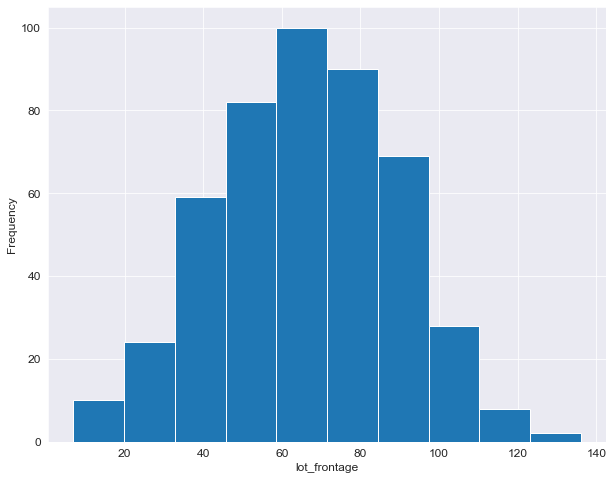

In [41]:
# Plot the random distribution of the 'LotFrontage' column
plt.hist(lot_frontage_rand)
plt.xlabel('lot_frontage')
plt.ylabel('Frequency')
plt.show()

In [42]:
housing_df['lot_frontage'] = housing_df['lot_frontage'].fillna('9999')
housing_df['garage_yr_blt'] = housing_df['garage_yr_blt'].fillna('9999')
housing_df.loc[housing_df['lot_frontage']=='9999','lot_frontage'] = lot_frontage_rand
housing_df.loc[housing_df['garage_yr_blt']=='9999','garage_yr_blt'] = garage_yr_blt_rand


In [43]:
# Drop the rest
print('Before: ', housing_df.shape)
housing_df = housing_df.dropna()
print('After: ', housing_df.shape)

Before:  (2700, 80)
After:  (2599, 80)


In [44]:
# Verify that all null values are gone
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nan_col_list

[]

# C. Create Dummy Variables for Categorical Columns

In [45]:
housing_df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


In [46]:
# Re-index housing_df so indices match 
housing_df.reset_index(inplace=True)
housing_df.head()

,order,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,1,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


In [47]:
dummies_df = pd.get_dummies(housing_df[cat_columns],prefix_sep='_',drop_first=False)
print(dummies_df.shape)
dummies_df.head()

(2599, 288)


,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,...,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [48]:
housing_df = pd.concat([housing_df, dummies_df], axis=1)
print(housing_df.shape)
housing_df.head(20)

(2599, 369)


,order,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,1,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
1,2,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
2,3,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
3,4,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
4,5,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
5,6,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
6,7,120,RL,41.0,4920,Pave,NA,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
7,8,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,...,0,0,0,1,0,0,0,0,1,0
8,9,120,RL,39.0,5389,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
9,10,60,RL,60.0,7500,Pave,NA,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0


In [49]:
housing_df.drop(cat_columns,axis=1,inplace=True)
housing_df.head()

,order,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,1,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
2,3,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,5,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
housing_df.shape

(2599, 325)

# D. Split Data into a Train and Test Set and scaling

In [51]:
from sklearn.model_selection import train_test_split 

In [52]:
x= housing_df.drop('saleprice',axis=1)

In [53]:
y = housing_df['saleprice']

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [56]:
for dataset in [X_train, X_test, y_train, y_test]:
    print(dataset.shape)

(1949, 324)
(650, 324)
(1949,)
(650,)


# Modeling

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model


In [58]:

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [59]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9283268940911797


R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 0% indicates that the model explains none of the variability of the response data around its mean



# Mean of Residuals

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out

In [60]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 30.538737814263726


# Check for Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms

Detecting heteroscedasticity!
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

[]

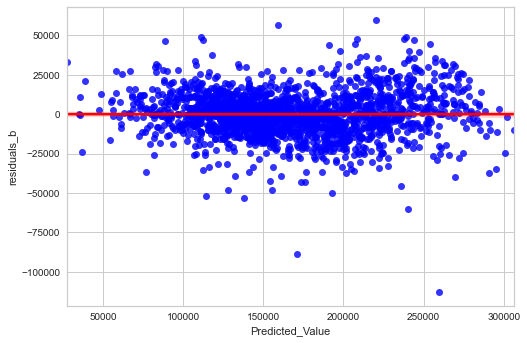

In [66]:
sns.regplot(y = residuals,x=(y_pred),scatter_kws={"color": "blue"},line_kws={"color": "red"})
plt.ylabel("residuals_b")
plt.xlabel("Predicted_Value")
plt.plot()

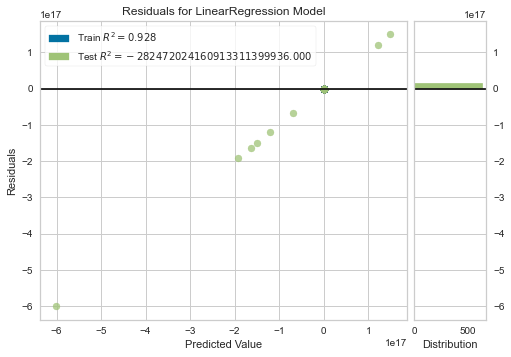

In [70]:
#res_b = residuals_plot(RandomForestRegressor(), X_train_b, y_train_b, X_test_b, y_test_b)
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot,residuals_plot
res_b = residuals_plot(LinearRegression(), X_train, y_train, X_test, y_test)

https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

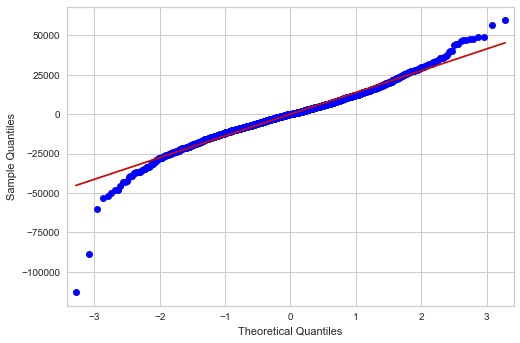

In [77]:
import statsmodels.api as sm
sm.qqplot(residuals, line ='r')
plt.show()

# Check for Normality of error terms/residuals

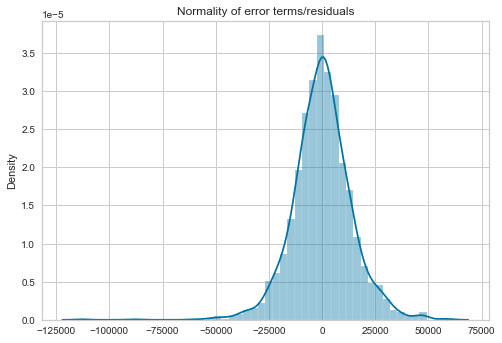

In [65]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')